One of the biggest challenge in machine learning is to choose the right model. Whether to go for linear regression model or to consider higher order polynomials? We should chose a model that have suitable trade-off between bias and variance. 

In [1]:
# Import the essential modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

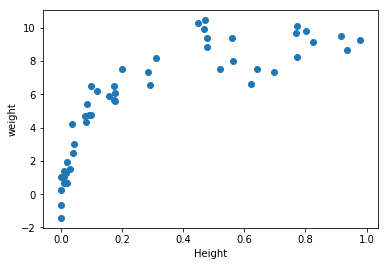

In [2]:
# Let's create our own dataset


def make_data(N, err = 1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1./(X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N) 
        
    return X, y

X, y = make_data(50)

# print(x.shape)
plt.scatter(X, y)
plt.xlabel('Height')
plt.ylabel('weight')
plt.show() # We got our data

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree = 2, **kwargs):
     return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [11]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv = 7)
# print(train_score)

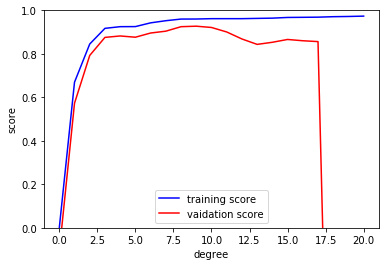

In [5]:
plt.plot(degree, np.median(train_score, axis = 1), color = 'b', label = 'training score')
plt.plot(degree, np.median(val_score, axis = 1), color = 'r', label = 'vaidation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

This shows the best possible degree of polynomial for our data is 3.

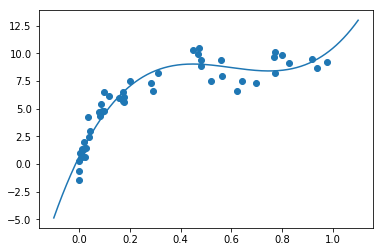

In [14]:
# Let's display this 3rd order polynomial fits
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y)
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.show()